In [46]:
from utils.MLP import MLPSequential
import numpy as np
import matplotlib.pyplot as plt
from utils.preprocess import get_df, set_data_for_model, set_data_for_model_with_eval
import seaborn as sns

import pandas as pd

In [47]:
data_path = 'data/data.csv'
df = get_df(data_path)

(X_train, X_valid, X_eval, y_train,
y_valid,y_eval) = set_data_for_model_with_eval(
                                    df, random_state=None, eval_size=10
                                    )

In [48]:
input_size = X_train.shape[1]

model = MLPSequential(input_size)

model.Dense(24, 'relu')
model.Dense(48, 'relu')
model.Dense(2, 'softmax')

model.compile()

Added layer with 24 neurons and relu activation.
Added layer with 48 neurons and relu activation.
Added layer with 2 neurons and softmax activation.
Model compiled successfully.


In [49]:
model.fit(X_train, y_train, epochs=100000, learning_rate=0.0349,
            validation_data=(X_valid, y_valid), early_stopping_patience=5)

Epoch 1/100000 - loss: 0.7829 - val_loss: 0.7094 - accuracy: 0.5817 - val_accuracy: 0.5982
Epoch 2/100000 - loss: 0.6850 - val_loss: 0.6281 - accuracy: 0.6331 - val_accuracy: 0.6964
Epoch 3/100000 - loss: 0.6170 - val_loss: 0.5692 - accuracy: 0.7248 - val_accuracy: 0.7679
Epoch 4/100000 - loss: 0.5685 - val_loss: 0.5260 - accuracy: 0.7852 - val_accuracy: 0.8571
Epoch 5/100000 - loss: 0.5315 - val_loss: 0.4932 - accuracy: 0.8233 - val_accuracy: 0.8661
Epoch 6/100000 - loss: 0.5017 - val_loss: 0.4668 - accuracy: 0.8680 - val_accuracy: 0.8661
Epoch 7/100000 - loss: 0.4764 - val_loss: 0.4445 - accuracy: 0.8814 - val_accuracy: 0.8839
Epoch 8/100000 - loss: 0.4543 - val_loss: 0.4249 - accuracy: 0.8904 - val_accuracy: 0.8839
Epoch 9/100000 - loss: 0.4344 - val_loss: 0.4076 - accuracy: 0.9060 - val_accuracy: 0.8839
Epoch 10/100000 - loss: 0.4167 - val_loss: 0.3922 - accuracy: 0.9128 - val_accuracy: 0.8929
Epoch 11/100000 - loss: 0.4007 - val_loss: 0.3782 - accuracy: 0.9150 - val_accuracy: 0.89

In [50]:
model.evaluate(X_valid, y_valid)

Test Loss: 0.0654 - Test Accuracy: 0.9911


(0.06537827567357767, 0.9910714285714286)

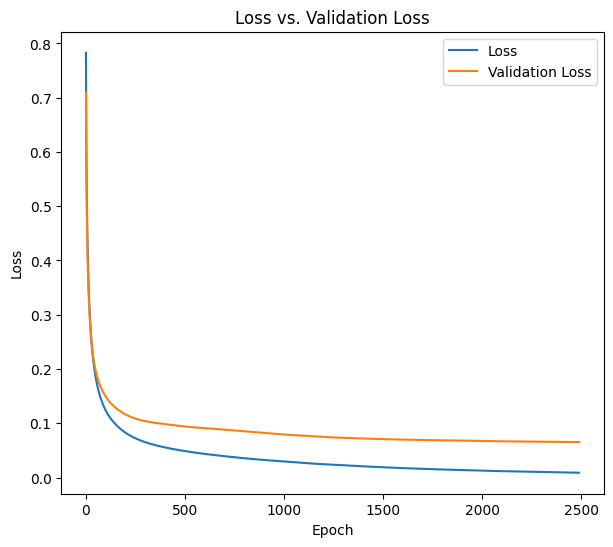

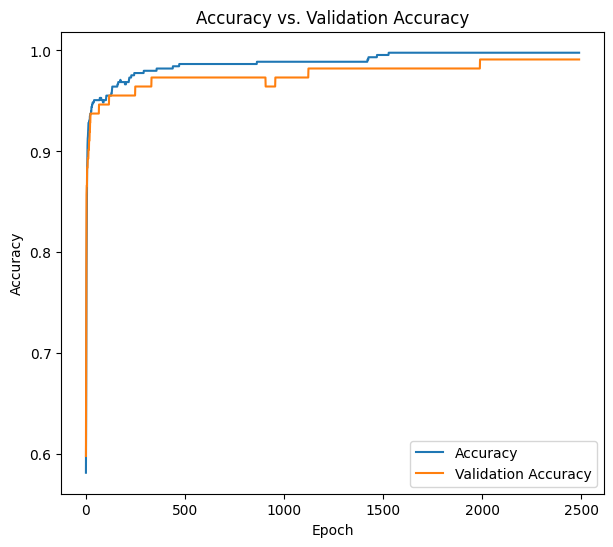

In [51]:
model.plot_loss()
model.plot_accuracy()

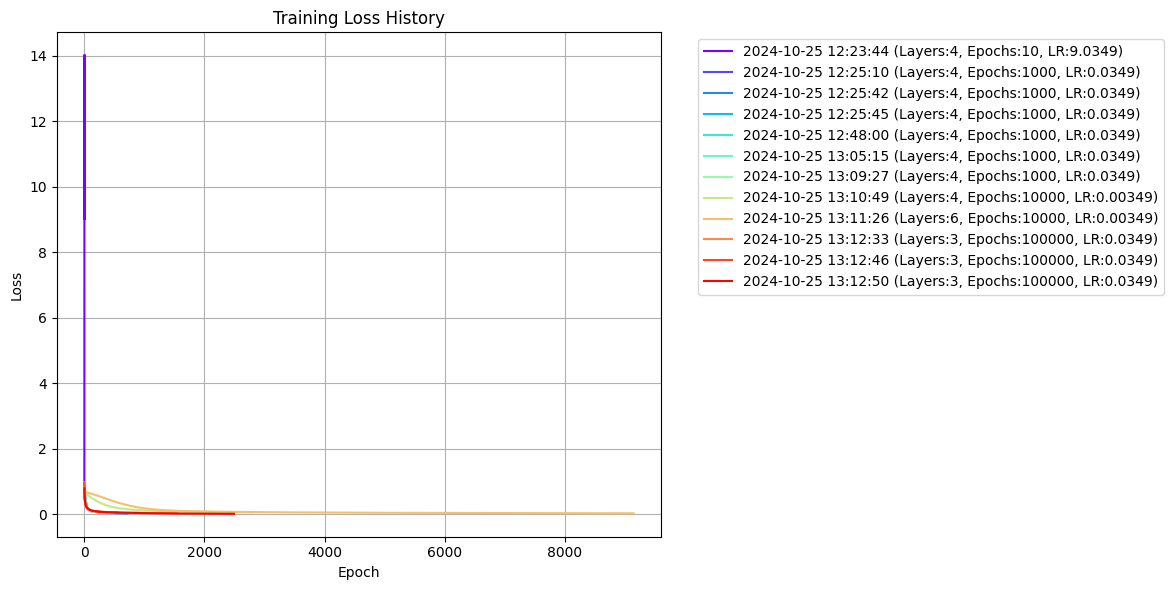

In [52]:
model.save_and_plot_history()

In [53]:
y_pred = model.predict(X_eval)

In [54]:
print(f"{'Subject':<10}{'Real diagnosis':<17}{'Predicted diagnosis':<22}{'Result':<17}\n")

for i, (pred, real) in enumerate(zip(y_pred, y_eval)):
    pred_txt = "Benign" if pred == 0 else "Malignant"
    real_txt = "Benign" if real == 0 else "Malignant"
    result = "Success" if pred_txt == real_txt else "Fail"
    print(f"{i:<10}{real_txt:<17}{pred_txt:<22}{result:<17}")

Subject   Real diagnosis   Predicted diagnosis   Result           

0         Benign           Benign                Success          
1         Benign           Benign                Success          
2         Benign           Benign                Success          
3         Malignant        Malignant             Success          
4         Malignant        Malignant             Success          
5         Malignant        Malignant             Success          
6         Malignant        Malignant             Success          
7         Benign           Benign                Success          
8         Malignant        Malignant             Success          
9         Benign           Benign                Success          
